In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

In [2]:
import zipfile

with zipfile.ZipFile('1-s2.0-S2352340918315191-mmc2.zip') as zip_file:
    f_h1 = zip_file.open('H1.csv')
    df_h1 = pd.read_csv(f_h1)
    f_h2 = zip_file.open('H2.csv')
    df_h2 = pd.read_csv(f_h2)

# Both hotels are located in Portugal:
# - H1 at the resort region of Algarve
# - H2 at the city of Lisbon
df_h1['Type'] = 'resort'
df_h2['Type'] = 'city'

# merging two parts into one
df = pd.concat([df_h1, df_h2])
df = df.reset_index(drop=True)

# Задание 1

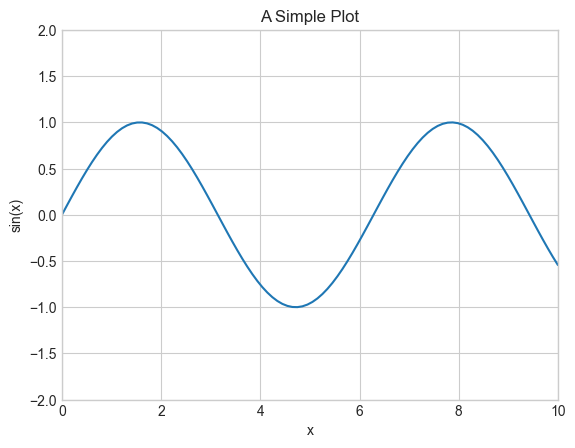

In [3]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()

ax.set_ylabel('sin(x)')
ax.set_xlabel('x')
ax.set_title('A Simple Plot')
plt.axis([0, 10, -2.0, 2.0])
plt.plot(x, np.sin(x), '-')

# Задание 3

In [5]:

def camel_to_snake(s):
    return ''.join(['_'+c.lower() if c.isupper() else c for c in s]).lstrip('_')

df.columns = [camel_to_snake(column_name) for column_name in df.columns]


df['arrival_date_str'] = df['arrival_date_year'].astype('str') + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype('str')
df['arrival_date'] = pd.to_datetime(df['arrival_date_str'])
df['arrival_date_str'] = df['arrival_date'].dt.strftime('%Y-%m-%d')
df['y:m'] = df['arrival_date'].dt.to_period('M')
df_c_1 = df[df['type']=='resort']
df_c_2 = df[df['type']=='city']
df_c_1 = pd.DataFrame({'count':df_c_1.groupby('country')['country'].count()})
df_c_2 = pd.DataFrame({'count':df_c_2.groupby('country')['country'].count()})
all_count_1 = sum(df_c_1['count'])
all_count_2 = sum(df_c_2['count'])
df_c_1['count'] = df_c_1['count'].astype(int)/all_count_1*100
df_c_2['count'] = df_c_2['count'].astype(int)/all_count_2*100
df_1 = df[df['type']=='resort']
df_2 = df[df['type']=='city']
df_1 = pd.DataFrame({'count':df_1.groupby('y:m')['y:m'].count()})
df_2 = pd.DataFrame({'count':df_2.groupby('y:m')['y:m'].count()})
df_1 = df_1.reset_index()
df_2 = df_2.reset_index()
df_c_1 = df_c_1.reset_index().sort_values(by='count', ascending=False)
df_c_2 = df_c_2.reset_index().sort_values(by='count', ascending=False)
df_ym_1 = pd.DataFrame({'count':df[df['type']=='city'].groupby('y:m')['y:m'].count()})
df_ym_1 = df_ym_1.reset_index().sort_values(by='y:m', ascending=True)
df_ym_2 = pd.DataFrame({'count':df[df['type']=='resort'].groupby('y:m')['y:m'].count()})
df_ym_2 = df_ym_2.reset_index().sort_values(by='y:m', ascending=True)
df_ym_2.head(5)

,y:m,count
0,2015-07,1378
1,2015-08,1409
2,2015-09,1585
3,2015-10,1571
4,2015-11,1105


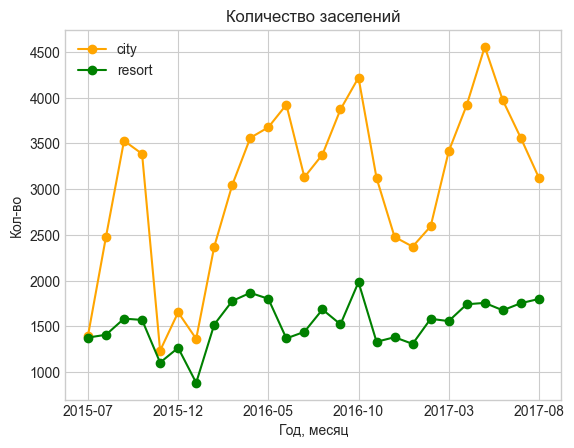

In [6]:

plt.xticks(df_1.index[::5])
plt.plot(df_2['y:m'].astype(str), df_2['count'], '-o', color='orange', label='city')
plt.plot(df_1['y:m'].astype(str), df_1['count'], '-o', color='green', label='resort')
plt.ylabel('Кол-во')
plt.xlabel('Год, месяц')
plt.title('Количество заселений')
plt.legend()


# Задание 4

Text(0.5, 1.0, 'Количество заселений')

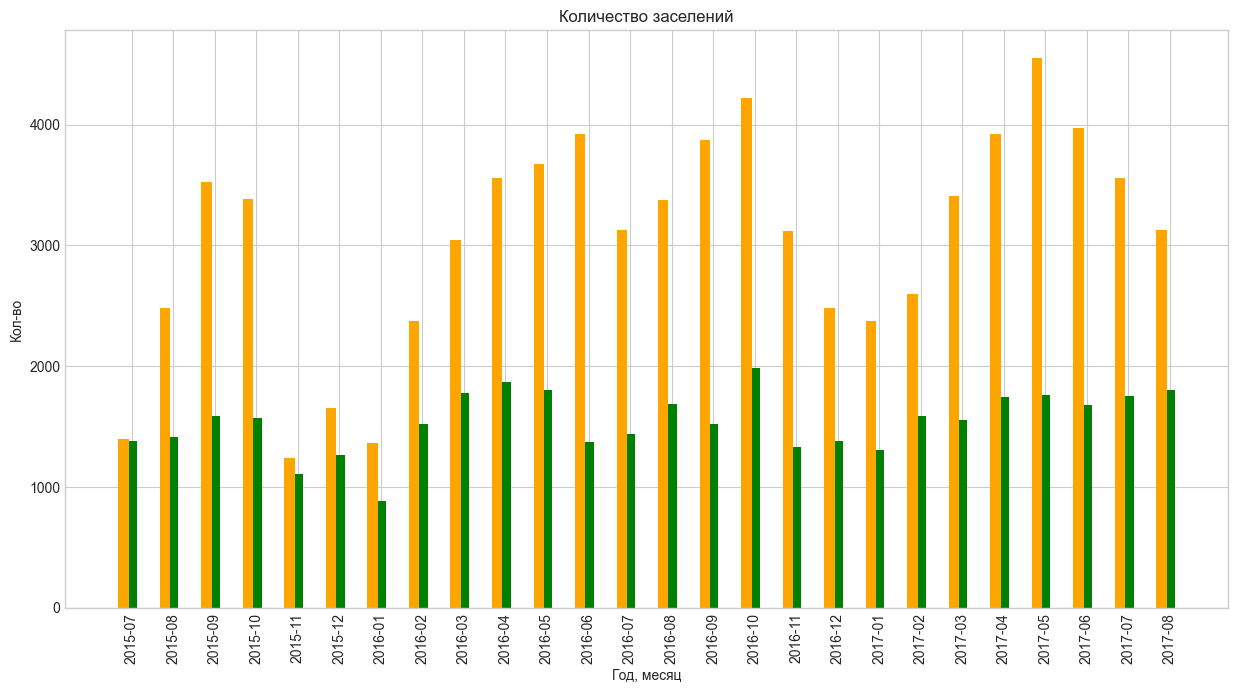

In [7]:
plt.figure(figsize=(15,7.5))
indexes = np.arange(len(df_1['y:m']))
width = 0.1
bar_resort = plt.bar(indexes+width, df_1['count'], width=0.25, color='green', label='resort')
bar_city = plt.bar(indexes-width, df_2['count'], width=0.25, color='orange', label='city')
plt.xticks(indexes+width, df_1['y:m'], rotation=90)
plt.xlabel('Год, месяц')
plt.ylabel('Кол-во')
plt.title('Количество заселений')

# Задание 5

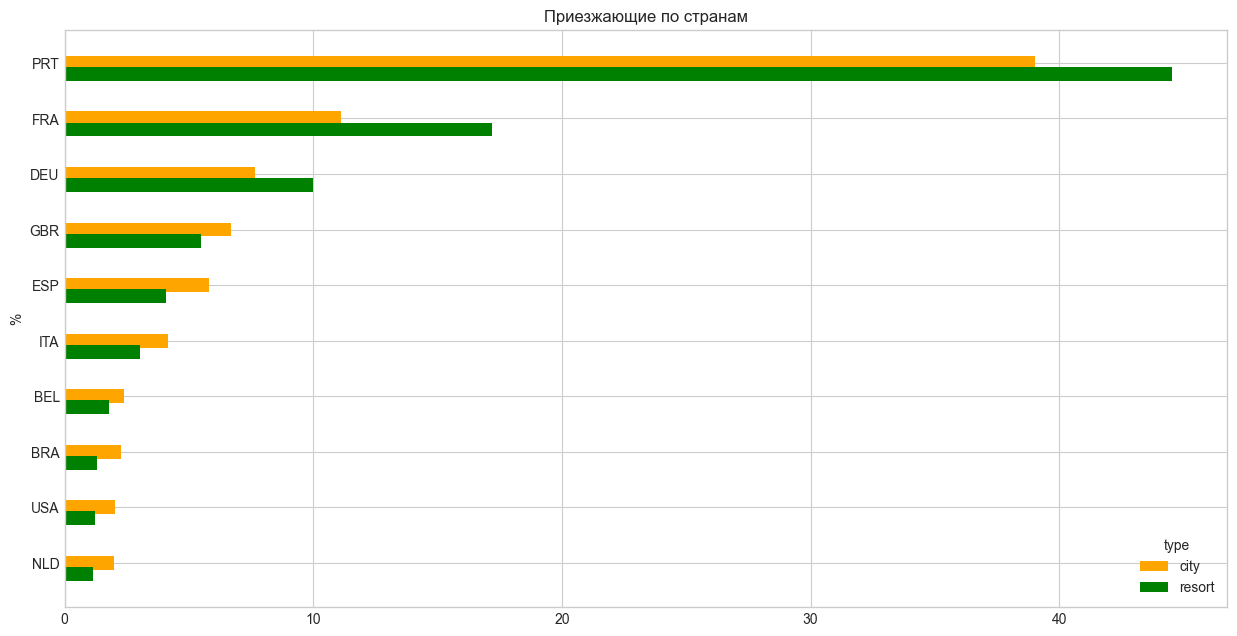

In [8]:
plt.figure(figsize=(15,7.5))    
indexes = np.arange(len(df_c_2['country'][9::-1]))
width = 0.1

plt.barh(indexes+width, df_c_2['count'][9::-1], color='orange', label='city', height=0.25)
plt.barh(indexes-width, df_c_1['count'][9::-1], color='green', label='resort', height=0.25)
plt.yticks(indexes+width, df_c_2['country'][9::-1])
plt.ylabel('%')
plt.title('Приезжающие по странам')
plt.legend(title='type')

# Задание 6

<Axes: xlabel='days_in_waiting_list', ylabel='type'>

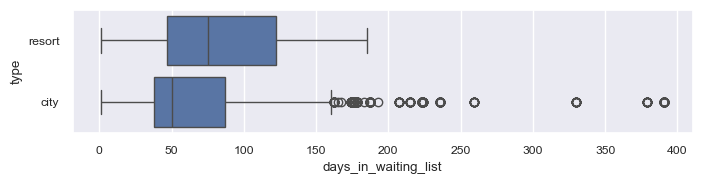

In [12]:
filtered_df = df[df['days_in_waiting_list'] > 0]
fig, ax = plt.subplots(figsize=(8, 1.6))

sns.boxplot(data=filtered_df, x='days_in_waiting_list', y='type')